In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from colicoords import load, CellListPlot, iter_subplots, IterCellPlot, AutoIterCellPlot
import numpy as np

This example shows how to explore datasets of cells and make selections in those datasets based on user-defined criteria. For this, a dataset with 100 cells has been previously generated. It consists of cells with a homogenous cytomplasmic background with on average 10 foci on the membrane. The foci are identified as single localizations in a corresponding storm-type data element.

In [2]:
cells = load('data/05_synthetic_foci.hdf5')

<IPython.core.display.Javascript object>


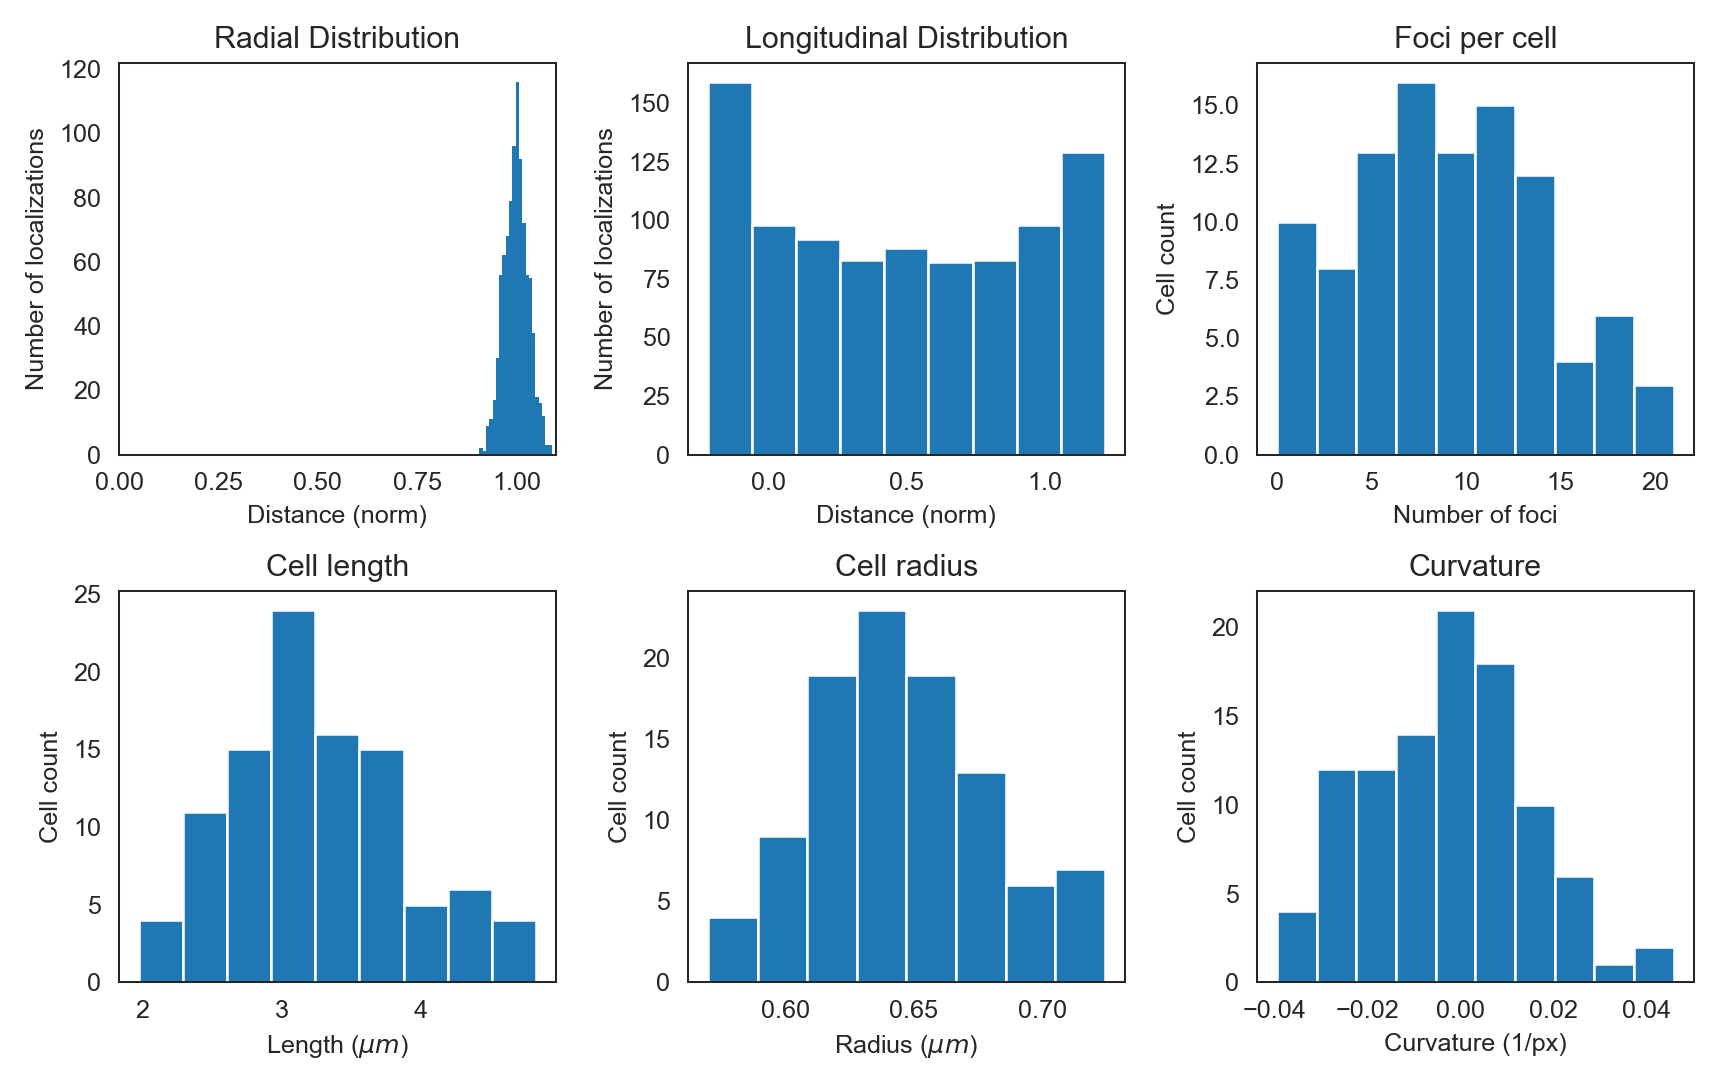

In [3]:
num_foci = [len(cell.data.data_dict['storm']) for cell in cells]
curvature = [2*cell.coords.a2 for cell in cells]

fig, axes = plt.subplots(2, 3, figsize=(9.5, 6))
clp = CellListPlot(cells)

clp.hist_r_storm(ax=axes[0, 0], norm_x=True, linewidth=0)
clp.hist_l_storm(ax=axes[0, 1])

axes[0, 2].hist(num_foci)
axes[0, 2].set_xlabel('Number of foci')
axes[0, 2].set_ylabel('Cell count')
axes[0, 2].set_title('Foci per cell')

#clp.hist_intensity(ax=axes[0, 1])
clp.hist_property('length', ax=axes[1, 0])
clp.hist_property('radius', ax=axes[1, 1])

axes[1, 2].hist(curvature)
axes[1, 2].set_xlabel('Curvature (1/px)')
axes[1, 2].set_ylabel('Cell count')
axes[1, 2].set_title('Curvature')

plt.tight_layout()

The figure above shows from left to right and top to bottom:
- The radial distribution of all localized foci of all cells. This is the distance `r` from the midline of the cell, here normalized by the radius of the cell as defined in the coordinate system.
- The longitudinal distribution of all foci. The length of all cells are normalized between 0 and 1 and the poles are scaled with the mean length of all cells. Although the foci are uniformly distributed, the foci are more freqent at bins at the poles (l < 0 and l > 1) because at these regions there is more membrane per bin.
- The number of fluorescenct foci per cell. There is not a function for plotting this by ``CellListPlot`` so we get the numbers by using ``len`` in a list comprehension to calculate ``num_foci`` and give this to Matplotlib's `hist()`
- The length of the cells in $\mu$m.
- The radius of the cells in $\mu$m.
- The curvature of the cells, this is approximated by the second derivative which is again calculated in a list comprehension.

To rapidly look though datasets and inspect cells individually, ``ColiCoords`` offers the ``IterCellPlot`` functionality. The ``IterCellPlot`` class behaves as a normal ``CellPlot``, except it is initiated with a ``CellList`` instance. Otherwise, the desired graphs can be made in the usual way. The ``IterCellPlot`` will then plot only the graphs of the first cell in the dataset, and by calling `fig1.display()`, buttons and a textfield are provided to look through the data.<br>
Behind the scences, all cells in the dataset are padded to all have the same shape. This is done to improve performance of updating the graphs when browsing. The data in the original ``CellList`` is unaffected.

<IPython.core.display.Javascript object>


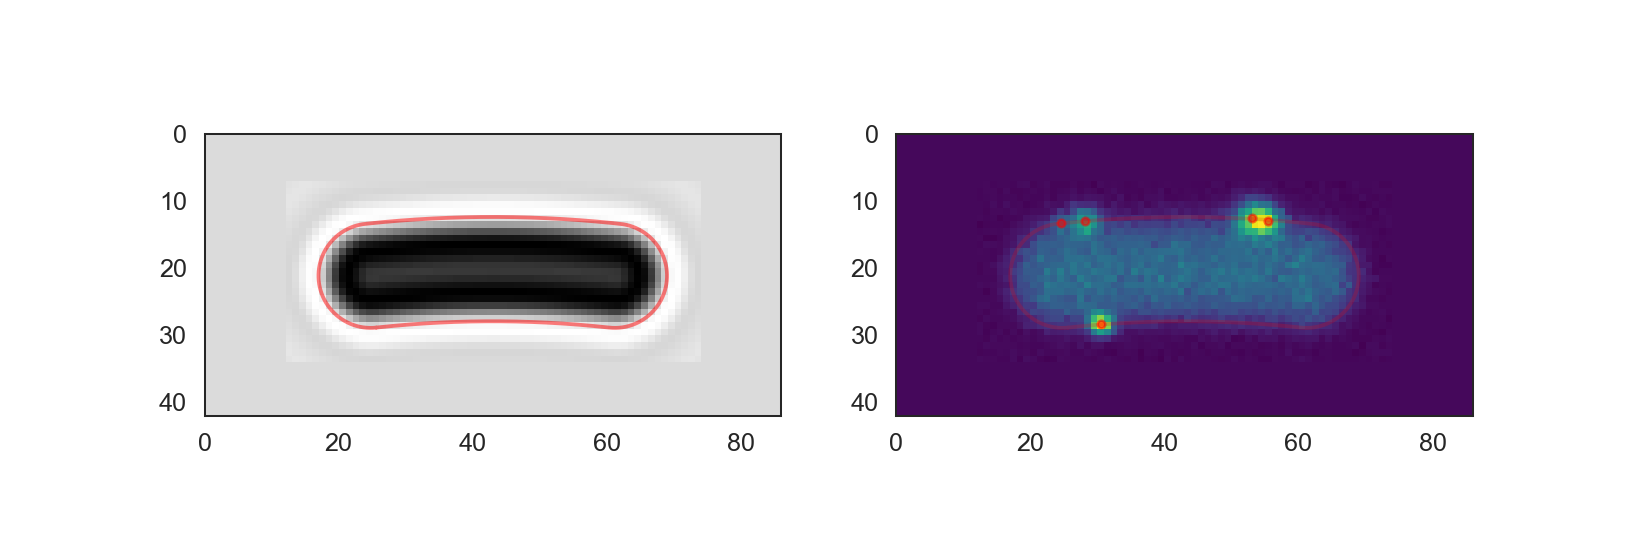

In [4]:
fig1, axes = iter_subplots(1, 2, figsize=(9, 3))
icp = IterCellPlot(cells)
icp.imshow('brightfield', ax=axes[0])
icp.plot_outline(alpha=0.5, ax=axes[0])
icp.imshow('fluorescence', ax=axes[1])
icp.plot_outline(alpha=0.2)
icp.plot_storm(alpha=0.5)
fig1.display()

To automatically plot all data elements in the datasets ``AutoIterCellPlot`` can be used:

<IPython.core.display.Javascript object>


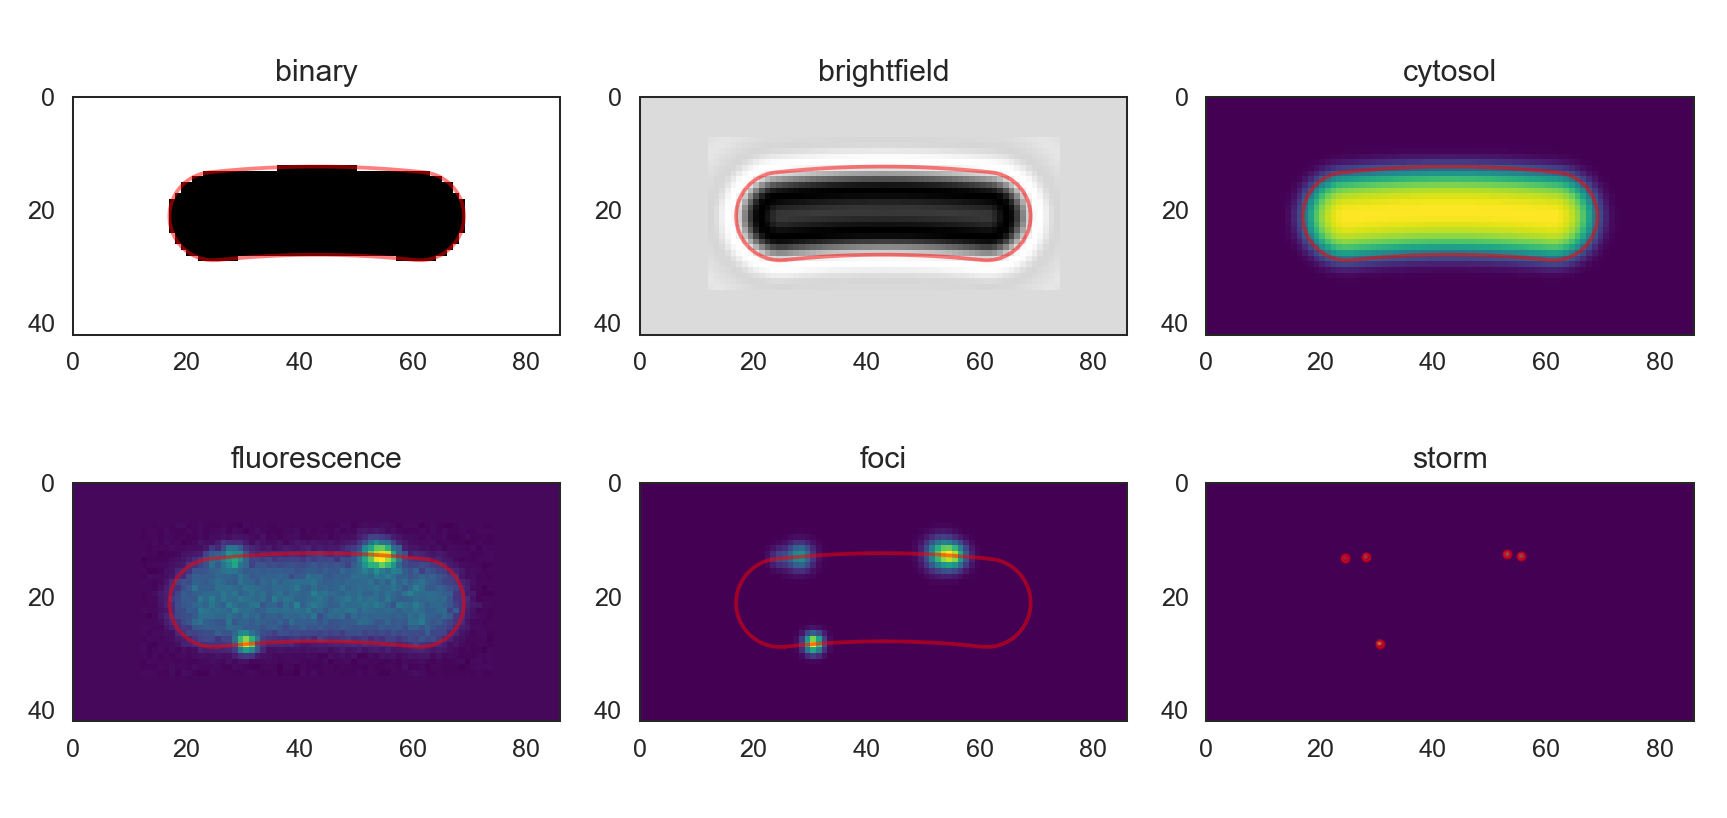

In [5]:
acip = AutoIterCellPlot(cells)
acip.plot(figsize=(9.5, 4.5))

``CellList`` objects can be indexed like a normal numpy `ndarray`. Lets say we want to select cells that have length above 3 $\mu$m, an average fluorescence intensity below 60, and a mimimum number of spots of 4. For this, three boolean arrays are generated as shown in the cell below. Note that all objects used in the comparison must be ``np.ndarrays`` in order to get a boolean array returned. `CellList.length` and `CellList.get_intensity()` both return ``np.ndarrays``. To get the final boolean array, they individual arrays are multiplied, thereby performing an AND operation on all boolean elements.

In [6]:
length_bool = cells.length > 3.*(1000/80)
int_bool = cells.get_intensity() < 60
num_spots = np.array(num_foci) > 4

bools = length_bool * int_bool * num_spots

The boolean array can then be applied to the dataset to only selected the desired cells. Note that in order to keep both interactive plots active, the ``Figure`` subclass returned by ``iter_subplots`` needs to have different names to keep them from being garbage collected, i.e. `fig1`, `fig2`.

<IPython.core.display.Javascript object>


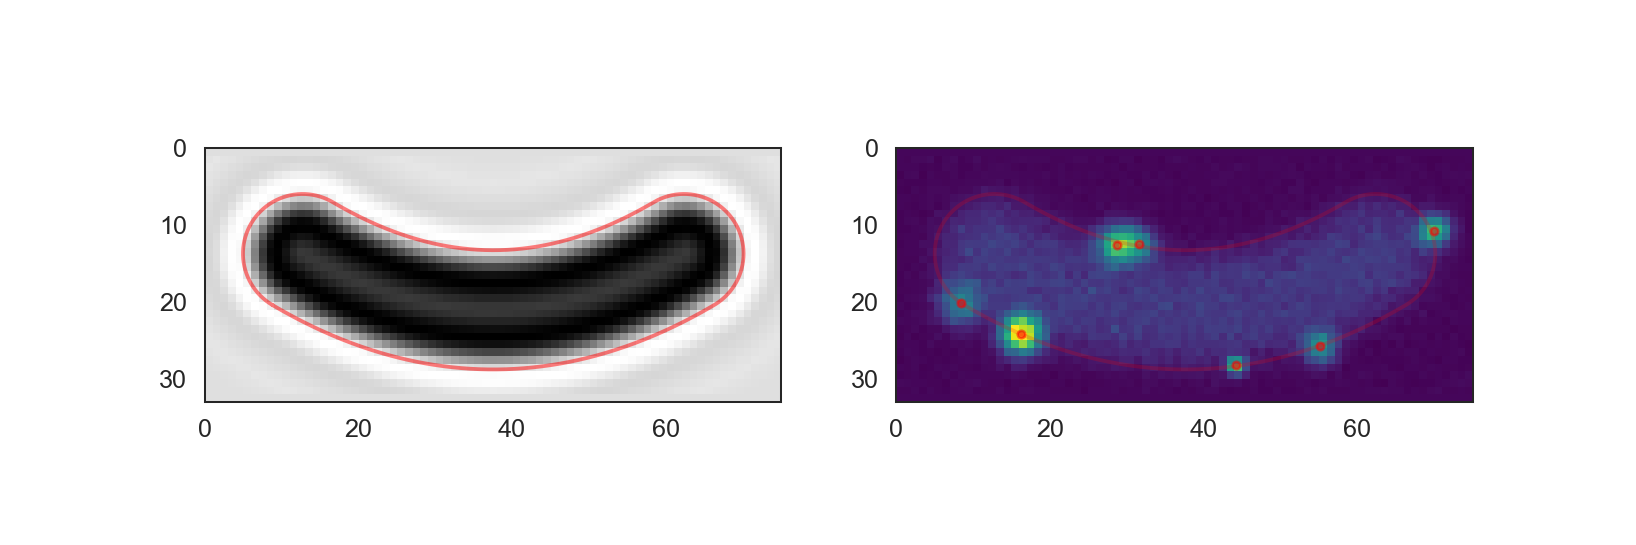

In [9]:
selected_cells = cells[bools]

fig2, axes = iter_subplots(1, 2, figsize=(9, 3))
icp = IterCellPlot(selected_cells)
icp.imshow('brightfield', ax=axes[0])
icp.plot_outline(alpha=0.5, ax=axes[0])
icp.imshow('fluorescence', ax=axes[1])
icp.plot_outline(alpha=0.2)
icp.plot_storm(alpha=0.5)
fig2.display()